In [1]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

/home/anupam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = quandl.get('WIKI/GOOGL')
#print(df)
df.iloc[-1]
# df = pd.read_csv('googleStocks.csv',header=0)
# df = df.set_index('Date')
# df.head()

Open              1063.90
High              1064.54
Low                997.62
Close             1006.94
Volume         2940957.00
Ex-Dividend          0.00
Split Ratio          1.00
Adj. Open         1063.90
Adj. High         1064.54
Adj. Low           997.62
Adj. Close        1006.94
Adj. Volume    2940957.00
Name: 2018-03-27 00:00:00, dtype: float64

In [3]:
# df = pd.read_csv('googleStocks.csv',header=0)
# df = df.set_index('Date')
# df.iloc[-1]

In [4]:
# df.to_csv("googleStocks.csv", sep=',', encoding='utf-8', date_format='%Y-%m-%d %H:%M:%S')
# df2 = pd.read_csv('googleStocks.csv',header=0)
#df2 = df.set_index('Date')
# df2.head()

In [5]:
df = df[['Adj. Open','Adj. High','Adj. Low', 'Adj. Close', 'Adj. Volume']]
print(df)

              Adj. Open    Adj. High     Adj. Low   Adj. Close  Adj. Volume
Date                                                                       
2004-08-19    50.159839    52.191109    48.128568    50.322842   44659000.0
2004-08-20    50.661387    54.708881    50.405597    54.322689   22834300.0
2004-08-23    55.551482    56.915693    54.693835    54.869377   18256100.0
2004-08-24    55.792225    55.972783    51.945350    52.597363   15247300.0
2004-08-25    52.542193    54.167209    52.100830    53.164113    9188600.0
2004-08-26    52.637487    54.142132    52.492038    54.122070    7094800.0
2004-08-27    54.217364    54.478169    53.008633    53.239345    6211700.0
2004-08-30    52.802998    52.908323    51.162935    51.162935    5196700.0
2004-08-31    51.318415    52.015567    51.238167    51.343492    4917800.0
2004-09-01    51.509003    51.644421    49.989312    50.280210    9138200.0
2004-09-02    49.698414    51.343492    49.623182    50.912161   15118600.0
2004-09-03  

In [6]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
print(df)

              Adj. Open    Adj. High     Adj. Low   Adj. Close  Adj. Volume  \
Date                                                                          
2004-08-19    50.159839    52.191109    48.128568    50.322842   44659000.0   
2004-08-20    50.661387    54.708881    50.405597    54.322689   22834300.0   
2004-08-23    55.551482    56.915693    54.693835    54.869377   18256100.0   
2004-08-24    55.792225    55.972783    51.945350    52.597363   15247300.0   
2004-08-25    52.542193    54.167209    52.100830    53.164113    9188600.0   
2004-08-26    52.637487    54.142132    52.492038    54.122070    7094800.0   
2004-08-27    54.217364    54.478169    53.008633    53.239345    6211700.0   
2004-08-30    52.802998    52.908323    51.162935    51.162935    5196700.0   
2004-08-31    51.318415    52.015567    51.238167    51.343492    4917800.0   
2004-09-01    51.509003    51.644421    49.989312    50.280210    9138200.0   
2004-09-02    49.698414    51.343492    49.623182   

In [7]:
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


In [8]:
forecast_col = 'Adj. Close'
df.fillna(-9999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
# print(forecast_out)
df['Label'] = df[forecast_col].shift(-forecast_out)
print(df.tail(5))

            Adj. Close    HL_PCT  PCT_change  Adj. Volume  Label
Date                                                            
2018-03-21     1094.00  1.976619    0.130884    1990515.0    NaN
2018-03-22     1053.15  3.265882   -2.487014    3418154.0    NaN
2018-03-23     1026.55  4.089299   -2.360729    2413517.0    NaN
2018-03-26     1054.09  4.818025    0.332191    3272409.0    NaN
2018-03-27     1006.94  6.707965   -5.353887    2940957.0    NaN


In [9]:
# x = np.array(df.drop(['Label'],1))
# y = np.array(df['Label'])
# x = preprocessing.scale(x)
# df.dropna(inplace=True)
# y = np.array(df['Label'])
x = np.array(df.drop(['Label'], 1))
x = preprocessing.scale(x)
x_recent = x[-forecast_out:]
x = x[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['Label'])
print(df.tail(5))

            Adj. Close    HL_PCT  PCT_change  Adj. Volume    Label
Date                                                              
2018-01-30     1177.37  1.142604   -0.029718    1792602.0  1094.00
2018-01-31     1182.22  1.213207   -0.134312    1643877.0  1053.15
2018-02-01     1181.59  1.547000    0.476195    2774967.0  1026.55
2018-02-02     1119.20  1.811604   -0.729098    5798880.0  1054.09
2018-02-05     1068.76  5.512236   -2.893850    3742469.0  1006.94


In [10]:
x_train, x_test, y_train, y_test  = cross_validation.train_test_split(x, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train,y_train)
accuracy = clf.score(x_test,y_test)
print(accuracy)

0.9800596288598723


In [11]:
forecast_set = clf.predict(x_recent)
slope = clf.coef_
intercept = clf.intercept_
print(slope,intercept)

[260.30497623  -1.61675829   0.75146929  -2.55359221] 420.0125289234445


In [12]:
import datetime
import matplotlib.pyplot as plpt
from matplotlib import style

In [13]:
df.iloc[-1]

Adj. Close     1.068760e+03
HL_PCT         5.512236e+00
PCT_change    -2.893850e+00
Adj. Volume    3.742469e+06
Label          1.006940e+03
Name: 2018-02-05 00:00:00, dtype: float64

In [14]:
style.use('ggplot')
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]



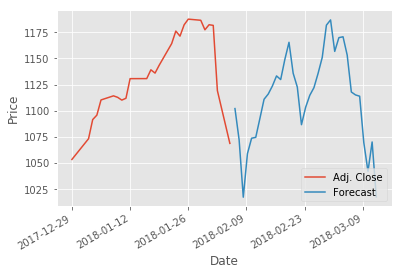

In [15]:
df['Adj. Close'][-60:].plot()
df['Forecast'].plot()
plpt.legend(loc = 4)
plpt.xlabel('Date')
plpt.ylabel('Price')
plpt.show()